# Train the model

In [3]:
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import load_model
from keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../functions')
from ipynb.fs.full.models import regression


Using TensorFlow backend.


trial information:
- pure signals, without noise
- uniformly scaled
- mass sampled with respect to chirp mass and eta

# Load data

In [4]:
# load main regression data 
f_path = 'r_data_3B.h5'
X = pd.read_hdf(f_path, 'X')
y = pd.read_hdf(f_path, 'y')

In [3]:
# Data preprocessing

# uniformly scale data
X_scaled=X*(10**22)

# Train test split with sklearn
X_train,X_test,y_train,y_test = train_test_split(X_scaled.values,y.values,test_size=0.1,random_state=13)

# save test set
f_path = 'r_testdata_2B.h5'
X_test_df = pd.DataFrame(X_test)
y_test_df = pd.DataFrame(y_test)
X_test_df.to_hdf(f_path, key='X', mode='w')
y_test_df.to_hdf(f_path, key='y')

C:\Users\Ruining\.conda\envs\machine_learning\lib\site-packages\pandas\core\generic.py:2531: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->floating,key->block0_values] [items->[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167

In [6]:
# Reshape data
Xtrain = []
for i in np.arange(len(X_train)):
    h = X_train[i].reshape(4096,1)
    Xtrain.append(h)
X_train = np.asarray(Xtrain)

Xtest = []
for i in np.arange(len(X_test)):
    h = X_test[i].reshape(4096,1)
    Xtest.append(h)
X_test = np.asarray(Xtest)

# Train

In [5]:
# Check model performance accuracy before
model = load_model("regression3A.h5")

# Pre_train score record
pre_score = model.evaluate(X_test, y_test, verbose=1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
1600/1600 [==============================] - 3s 2ms/step


In [6]:
print(pre_score)

[8.106434803009034, 433.5517181396484, 8.106434803009034]


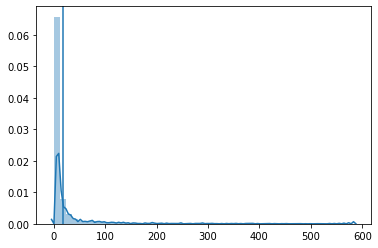

Mean %difference: 18.699690204226926
Standard deviation of %difference: 50.78755003040965


In [7]:
# predict before training
preds_bf = model.predict(X_test)
 
# compute the difference between the *predicted* and *actual* 
# then compute the percentage difference and the absolute percentage difference
diff_bf = preds_bf.flatten() - y_test.flatten()
percentDiff_bf = (diff_bf / y_test.flatten()) * 100
absPercentDiff_bf = np.abs(percentDiff_bf)
 
# compute the mean and standard deviation of the absolute percentage
# difference
mean_bf = np.mean(absPercentDiff_bf)
std_bf = np.std(absPercentDiff_bf)

sns.distplot(absPercentDiff_bf)
plt.axvline(mean_bf, 0,1)
plt.show()

print("Mean %difference:",mean_bf)
print("Standard deviation of %difference:",std_bf)

In [8]:
epoch = 250
batch_size = 5

earlystopping_callback = EarlyStopping(monitor='mean_squared_error',verbose=1,min_delta=0.5,patience=45,baseline=None)

history = model.fit(X_train, y_train, validation_split = 0.20, batch_size=batch_size, epochs=epoch, verbose=1,
                   callbacks=[earlystopping_callback])

Train on 11520 samples, validate on 2880 samples
Epoch 1/250
11520/11520 [==============================] - 22s 2ms/step - loss: 3.2865 - mean_squared_error: 31.1681 - mean_absolute_error: 3.2865 - val_loss: 2.9363 - val_mean_squared_error: 24.0357 - val_mean_absolute_error: 2.9363
Epoch 2/250
11520/11520 [==============================] - 21s 2ms/step - loss: 2.8645 - mean_squared_error: 22.7828 - mean_absolute_error: 2.8645 - val_loss: 2.8870 - val_mean_squared_error: 22.7867 - val_mean_absolute_error: 2.8870
Epoch 3/250
11520/11520 [==============================] - 22s 2ms/step - loss: 2.6552 - mean_squared_error: 19.6001 - mean_absolute_error: 2.6552 - val_loss: 2.9471 - val_mean_squared_error: 24.0896 - val_mean_absolute_error: 2.9471
Epoch 4/250
11520/11520 [==============================] - 22s 2ms/step - loss: 2.4713 - mean_squared_error: 16.8566 - mean_absolute_error: 2.4713 - val_loss: 2.8134 - val_mean_squared_error: 21.2231 - val_mean_absolute_error: 2.8134
Epoch 5/250
115

Epoch 36/250
11520/11520 [==============================] - 21s 2ms/step - loss: 0.9311 - mean_squared_error: 2.0456 - mean_absolute_error: 0.9311 - val_loss: 2.4690 - val_mean_squared_error: 17.3111 - val_mean_absolute_error: 2.4690
Epoch 37/250
11520/11520 [==============================] - 21s 2ms/step - loss: 0.9378 - mean_squared_error: 2.0630 - mean_absolute_error: 0.9378 - val_loss: 2.4312 - val_mean_squared_error: 17.0761 - val_mean_absolute_error: 2.4312
Epoch 38/250
11520/11520 [==============================] - 21s 2ms/step - loss: 0.9207 - mean_squared_error: 2.0126 - mean_absolute_error: 0.9207 - val_loss: 2.4921 - val_mean_squared_error: 16.8827 - val_mean_absolute_error: 2.4921
Epoch 39/250
11520/11520 [==============================] - 21s 2ms/step - loss: 0.9029 - mean_squared_error: 1.9014 - mean_absolute_error: 0.9029 - val_loss: 2.4716 - val_mean_squared_error: 17.1282 - val_mean_absolute_error: 2.4716
Epoch 40/250
11520/11520 [==============================] - 21s 

11520/11520 [==============================] - 21s 2ms/step - loss: 0.6757 - mean_squared_error: 0.9993 - mean_absolute_error: 0.6757 - val_loss: 2.4384 - val_mean_squared_error: 16.2233 - val_mean_absolute_error: 2.4384
Epoch 72/250
11520/11520 [==============================] - 21s 2ms/step - loss: 0.6827 - mean_squared_error: 1.0115 - mean_absolute_error: 0.6827 - val_loss: 2.3966 - val_mean_squared_error: 15.8439 - val_mean_absolute_error: 2.3966
Epoch 73/250
11520/11520 [==============================] - 21s 2ms/step - loss: 0.6740 - mean_squared_error: 1.0058 - mean_absolute_error: 0.6740 - val_loss: 2.4351 - val_mean_squared_error: 16.2385 - val_mean_absolute_error: 2.4351
Epoch 74/250
11520/11520 [==============================] - 21s 2ms/step - loss: 0.6711 - mean_squared_error: 0.9924 - mean_absolute_error: 0.6711 - val_loss: 2.4669 - val_mean_squared_error: 16.4068 - val_mean_absolute_error: 2.4669
Epoch 75/250
11520/11520 [==============================] - 21s 2ms/step - lo

11520/11520 [==============================] - 21s 2ms/step - loss: 0.5779 - mean_squared_error: 0.7255 - mean_absolute_error: 0.5779 - val_loss: 2.3337 - val_mean_squared_error: 15.1900 - val_mean_absolute_error: 2.3337
Epoch 107/250
11520/11520 [==============================] - 21s 2ms/step - loss: 0.5662 - mean_squared_error: 0.6909 - mean_absolute_error: 0.5662 - val_loss: 2.3639 - val_mean_squared_error: 15.4946 - val_mean_absolute_error: 2.3639
Epoch 108/250
11520/11520 [==============================] - 21s 2ms/step - loss: 0.5770 - mean_squared_error: 0.7193 - mean_absolute_error: 0.5770 - val_loss: 2.3258 - val_mean_squared_error: 15.2622 - val_mean_absolute_error: 2.3258
Epoch 109/250
11520/11520 [==============================] - 21s 2ms/step - loss: 0.5686 - mean_squared_error: 0.6913 - mean_absolute_error: 0.5686 - val_loss: 2.3568 - val_mean_squared_error: 15.6035 - val_mean_absolute_error: 2.3568
Epoch 110/250
11520/11520 [==============================] - 21s 2ms/step 

# Save

In [10]:
# Save model
model.save('regression3B.h5')  # creates a HDF5 file 'my_model.h5'

In [11]:
import h5py
# save history
h = h5py.File('../history/r_history_3B.h5')
d = history.history
for k, v in d.items():
    h.create_dataset(k, data=np.array(v, dtype=np.float32))

# Training history

In [5]:
# uniformly scale data
X_scaled=X*(10**22)

# Train test split with sklearn
X_train,X_test,y_train,y_test = train_test_split(X_scaled.values,y.values,test_size=0.1,random_state=13)

In [7]:
# Check model performance accuracy before
model = load_model("regression3B.h5")


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [8]:
# evaluate after training
score = model.evaluate(X_test, y_test, verbose=1)
print(score)

UnknownError: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv1d_1/convolution/Conv2D}}]]

dict_keys(['val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'loss', 'mean_squared_error', 'mean_absolute_error'])


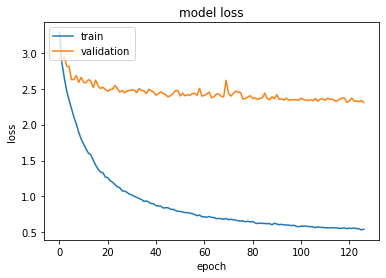

In [13]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Histograms

In [2]:
# histogram for both m1,m2

preds = model.predict(X_test)
 
# compute the difference between the *predicted* and *actual* 
# then compute the percentage difference and the absolute percentage difference
diff = preds.flatten() - y_test.flatten()
percentDiff = (diff / y_test.flatten()) * 100
absPercentDiff = np.abs(percentDiff)
 
# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)

sns.distplot(absPercentDiff)
plt.axvline(mean, 0,1)
plt.show()

print("Mean %difference:",mean)
print("Standard deviation of %difference:",std)

NameError: name 'model' is not defined

In [15]:
# Transfer m1,m2 to chirp mass and eta for y_test

M_actual = []
eta_actual = []

for p in y_test:
    m1 = p[0]
    m2 = p[1]
    M = (m1*m2)**(3/5)/(m1+m2)**(1/5)
    M_actual.append(M)
    e = (m1*m2)/(m1+m2)**2
    eta_actual.append(e)

M_actual = np.asarray(M_actual)
eta_actual = np.asarray(eta_actual)   
    
# Transfer m1,m2 to chirp mass and eta for prediction
M_preds = []
eta_preds = []
for p in preds:
    m1 = p[0]
    m2 = p[1]
    M = (m1*m2)**(3/5)/(m1+m2)**(1/5)
    M_preds.append(M)
    e = (m1*m2)/(m1+m2)**2
    eta_preds.append(e)
    
M_preds = np.asarray(M_preds)
eta_preds = np.asarray(eta_preds)

In [16]:
M_diff = M_preds - M_actual
c = (M_diff / M_actual) * 100
print(c)

[-0.2649921  -0.32141324  2.70049774 ... -2.32321813 -3.48499859
  0.89816329]


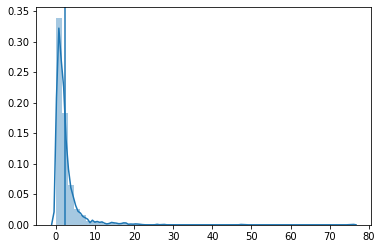

Mean %difference: 2.348941399158574
Standard deviation of %difference: 3.6586298426543946


In [17]:
# Chirp mass histogram

# compute the difference between the *predicted* and *actual* 
# then compute the percentage difference and the absolute percentage difference
M_diff = M_preds - M_actual
M_percentDiff = (M_diff / M_actual) * 100
M_absPercentDiff = np.abs(M_percentDiff)
 
# compute the mean and standard deviation of the absolute percentage
# difference
M_mean = np.mean(M_absPercentDiff)
M_std = np.std(M_absPercentDiff)

sns.distplot(M_absPercentDiff)
plt.axvline(M_mean, 0,1)
plt.show()

print("Mean %difference:",M_mean)
print("Standard deviation of %difference:",M_std)

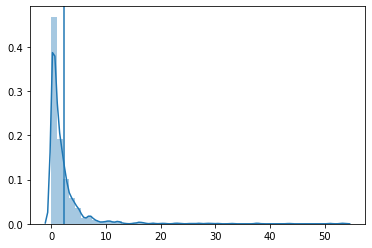

Mean %difference: 2.248608801591989
Standard deviation of %difference: 4.2395520593826985


In [18]:
# Eta histogram

# compute the difference between the *predicted* and *actual* 
# then compute the percentage difference and the absolute percentage difference
eta_diff = eta_preds - eta_actual
eta_percentDiff = (eta_diff / eta_actual) * 100
eta_absPercentDiff = np.abs(eta_percentDiff)
 
# compute the mean and standard deviation of the absolute percentage
# difference
eta_mean = np.mean(eta_absPercentDiff)
eta_std = np.std(eta_absPercentDiff)

sns.distplot(eta_absPercentDiff)
plt.axvline(eta_mean, 0,1)
plt.show()

print("Mean %difference:",eta_mean)
print("Standard deviation of %difference:",eta_std)

In [1]:
# Eta histogram

# compute the difference between the *predicted* and *actual* 
# then compute the percentage difference and the absolute percentage difference
eta_diff = eta_preds - eta_actual
eta_percentDiff = (eta_diff / eta_actual) * 100
eta_absPercentDiff = np.abs(eta_percentDiff)
 
# compute the mean and standard deviation of the absolute percentage
# difference
eta_mean = np.mean(eta_absPercentDiff)
eta_std = np.std(eta_absPercentDiff)

sns.distplot(eta_absPercentDiff, color="skyblue",label="eta")
plt.axvline(eta_mean, 0,1)
plt.show()

print("Mean %difference:",eta_mean)
print("Standard deviation of %difference:",eta_std)

NameError: name 'eta_preds' is not defined

# Select cases that have a larger percentage difference in chirp mass 

In [19]:
count = 0
percentage_cut = 2

percent = []
badmass = []

for i in np.arange(len(M_absPercentDiff)):
    if M_absPercentDiff[i] > percentage_cut:
        count += 1
        badmass.append(y_test[i])
        percent.append(M_absPercentDiff[i])
        print()
        print("Absolute Percent Difference for chirp mass: ",M_absPercentDiff[i])
        print("Actual masses: ",y_test[i])
        print("Predicted masses: ",preds[i])

print()
print("A total number of ", count, " predictions have above ", percentage_cut, " absolute percent difference.")


Absolute Percent Difference for chirp mass:  2.7004977443991005
Actual masses:  [20.3976699  88.44300212]
Predicted masses:  [21.174946 89.58627 ]

Absolute Percent Difference for chirp mass:  2.4776009518243085
Actual masses:  [17.00675172 69.53896073]
Predicted masses:  [15.996924 71.03328 ]

Absolute Percent Difference for chirp mass:  4.009502930806261
Actual masses:  [17.37654911 19.59782676]
Predicted masses:  [16.288078 22.726463]

Absolute Percent Difference for chirp mass:  3.4736033172713383
Actual masses:  [13.80213961 14.00419025]
Predicted masses:  [12.29206  16.921682]

Absolute Percent Difference for chirp mass:  13.747641201386246
Actual masses:  [70.63541376 98.55046946]
Predicted masses:  [65.353645 78.945984]

Absolute Percent Difference for chirp mass:  2.0064479648877147
Actual masses:  [89.12907947 99.45628555]
Predicted masses:  [90.96912 93.52084]

Absolute Percent Difference for chirp mass:  4.008119528385153
Actual masses:  [13.14271157 73.39965688]
Predicted

Actual masses:  [33.7254994  93.37586657]
Predicted masses:  [35.55816 91.85864]

Absolute Percent Difference for chirp mass:  6.789868818941929
Actual masses:  [20.71767902 26.09572732]
Predicted masses:  [21.032734 29.399858]

Absolute Percent Difference for chirp mass:  13.416845275793394
Actual masses:  [16.55380201 57.06960232]
Predicted masses:  [15.613487 44.475117]

Absolute Percent Difference for chirp mass:  3.2259465358758184
Actual masses:  [64.91647923 68.78104981]
Predicted masses:  [62.175583 67.26412 ]

Absolute Percent Difference for chirp mass:  2.6716137519461265
Actual masses:  [22.64398373 78.23983126]
Predicted masses:  [23.411667 79.6348  ]

Absolute Percent Difference for chirp mass:  2.1906118488780124
Actual masses:  [15.09004959 40.74918502]
Predicted masses:  [15.504131 37.58544 ]

Absolute Percent Difference for chirp mass:  3.6592775862508975
Actual masses:  [26.47135876 63.79815051]
Predicted masses:  [28.075447 64.37693 ]

Absolute Percent Difference for

Actual masses:  [83.91690135 86.21958426]
Predicted masses:  [76.58511 88.73936]

Absolute Percent Difference for chirp mass:  8.089217226905618
Actual masses:  [50.16064889 59.31021276]
Predicted masses:  [51.748634 67.304695]

Absolute Percent Difference for chirp mass:  3.7755521415391566
Actual masses:  [29.46843972 63.25636462]
Predicted masses:  [30.04584  56.965633]

Absolute Percent Difference for chirp mass:  2.0267019098782386
Actual masses:  [48.69977432 58.27606508]
Predicted masses:  [52.973274 55.685658]

Absolute Percent Difference for chirp mass:  3.1971086665743527
Actual masses:  [12.5985373  95.76628389]
Predicted masses:  [12.2815275 91.82397  ]

Absolute Percent Difference for chirp mass:  2.3388362335520765
Actual masses:  [50.94655834 97.82282303]
Predicted masses:  [52.827946 98.63268 ]

Absolute Percent Difference for chirp mass:  5.941203176155609
Actual masses:  [49.85748381 99.40947736]
Predicted masses:  [ 53.91946 102.87498]

Absolute Percent Difference fo

In [20]:
# make panda dataframe
summary = pd.DataFrame(badmass,columns = ["m1","m2"])
summary['percentage'] = percent

Blues = plt.get_cmap('Blues')
norm = [float(i)/max(percent) for i in percent]
colors = [Blues(c) for c in norm]

summary['colors']=colors

# For stage 1B data generation

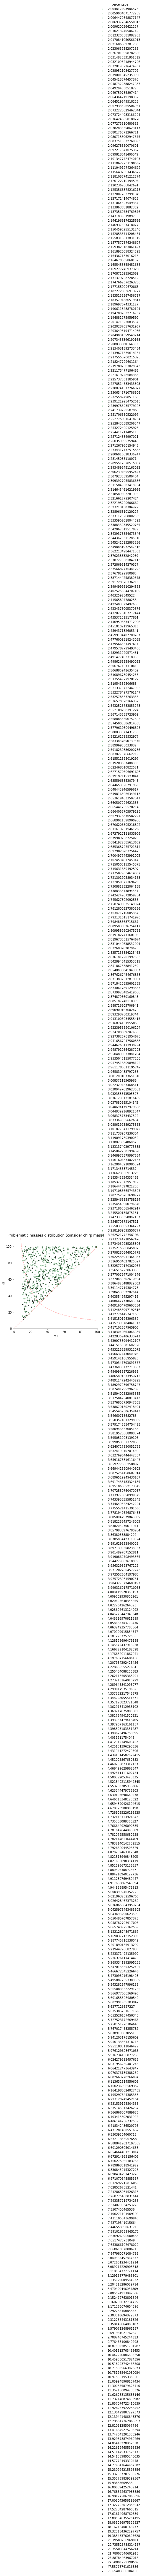

In [21]:
# Summary for training data 1B:

sns.lmplot(x="m1", y="m2",
           hue="percentage",
           data = summary,
           fit_reg=False,
           scatter_kws={"marker": "D",
                        "s": 10},
           palette = sns.cubehelix_palette(len(colors), start=2, rot=0, dark=0, light=.9))

plt.plot(np.arange(100),'r--',alpha=0.3)
plt.plot(1000/np.arange(1,100),'r--',alpha=0.3)

plt.title('Problematic masses distribution (consider chirp mass)')
plt.xlabel('m1')
plt.ylabel('m2')
plt.ylim(0,110)
plt.xlim(0,100)
plt.show()

In [25]:
count = 0
percentage_cut = 10

percent = []
badmass = []

for i in np.arange(len(M_absPercentDiff)):
    if M_absPercentDiff[i] > percentage_cut:
        count += 1
        badmass.append(y_test[i])
        percent.append(M_absPercentDiff[i])
        print()
        print("Absolute Percent Difference for chirp mass: ",M_absPercentDiff[i])
        print("Actual masses: ",y_test[i])
        print("Predicted masses: ",preds[i])

print()
print("A total number of ", count, " predictions have above ", percentage_cut, " absolute percent difference.")


Absolute Percent Difference for chirp mass:  13.747641201386246
Actual masses:  [70.63541376 98.55046946]
Predicted masses:  [65.353645 78.945984]

Absolute Percent Difference for chirp mass:  11.352150094780326
Actual masses:  [31.61031637 53.34774482]
Predicted masses:  [36.936405 56.344364]

Absolute Percent Difference for chirp mass:  47.55778741616836
Actual masses:  [10.19595057 29.41567073]
Predicted masses:  [12.006995 57.66658 ]

Absolute Percent Difference for chirp mass:  12.295617362860597
Actual masses:  [17.83487381 56.59894415]
Predicted masses:  [18.545826 69.95728 ]

Absolute Percent Difference for chirp mass:  11.928237922258452
Actual masses:  [18.76131937 57.94491915]
Predicted masses:  [17.025217 49.20196 ]

Absolute Percent Difference for chirp mass:  75.65403906104159
Actual masses:  [11.60303877 13.73873567]
Predicted masses:  [ 9.672924 58.6562  ]

Absolute Percent Difference for chirp mass:  20.75503044756241
Actual masses:  [59.41360179 83.77582556]
Predicte

In [26]:
# make panda dataframe
summary = pd.DataFrame(badmass,columns = ["m1","m2"])
summary['percentage'] = percent

Blues = plt.get_cmap('Blues')
norm = [float(i)/max(percent) for i in percent]
colors = [Blues(c) for c in norm]

summary['colors']=colors

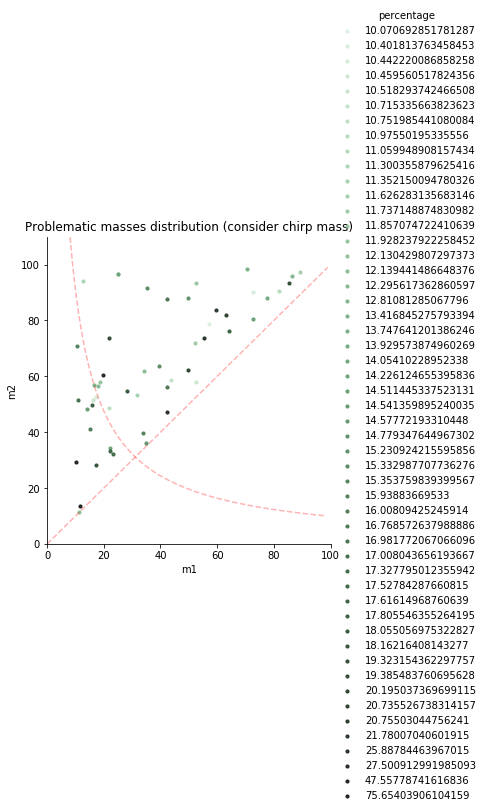

In [27]:
# Summary for training data 1B:

sns.lmplot(x="m1", y="m2",
           hue="percentage",
           data = summary,
           fit_reg=False,
           scatter_kws={"marker": "D",
                        "s": 10},
           palette = sns.cubehelix_palette(len(colors), start=2, rot=0, dark=0, light=.9))

plt.plot(np.arange(100),'r--',alpha=0.3)
plt.plot(1000/np.arange(1,100),'r--',alpha=0.3)

plt.title('Problematic masses distribution (consider chirp mass)')
plt.xlabel('m1')
plt.ylabel('m2')
plt.ylim(0,110)
plt.xlim(0,100)
plt.show()